In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('terr.csv', encoding = 'ISO-8859-1')    #read data from CSV file

C:\Users\Esraa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()           #show data frame

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape     #check data size

(181691, 135)

#### Figure out columns with null values

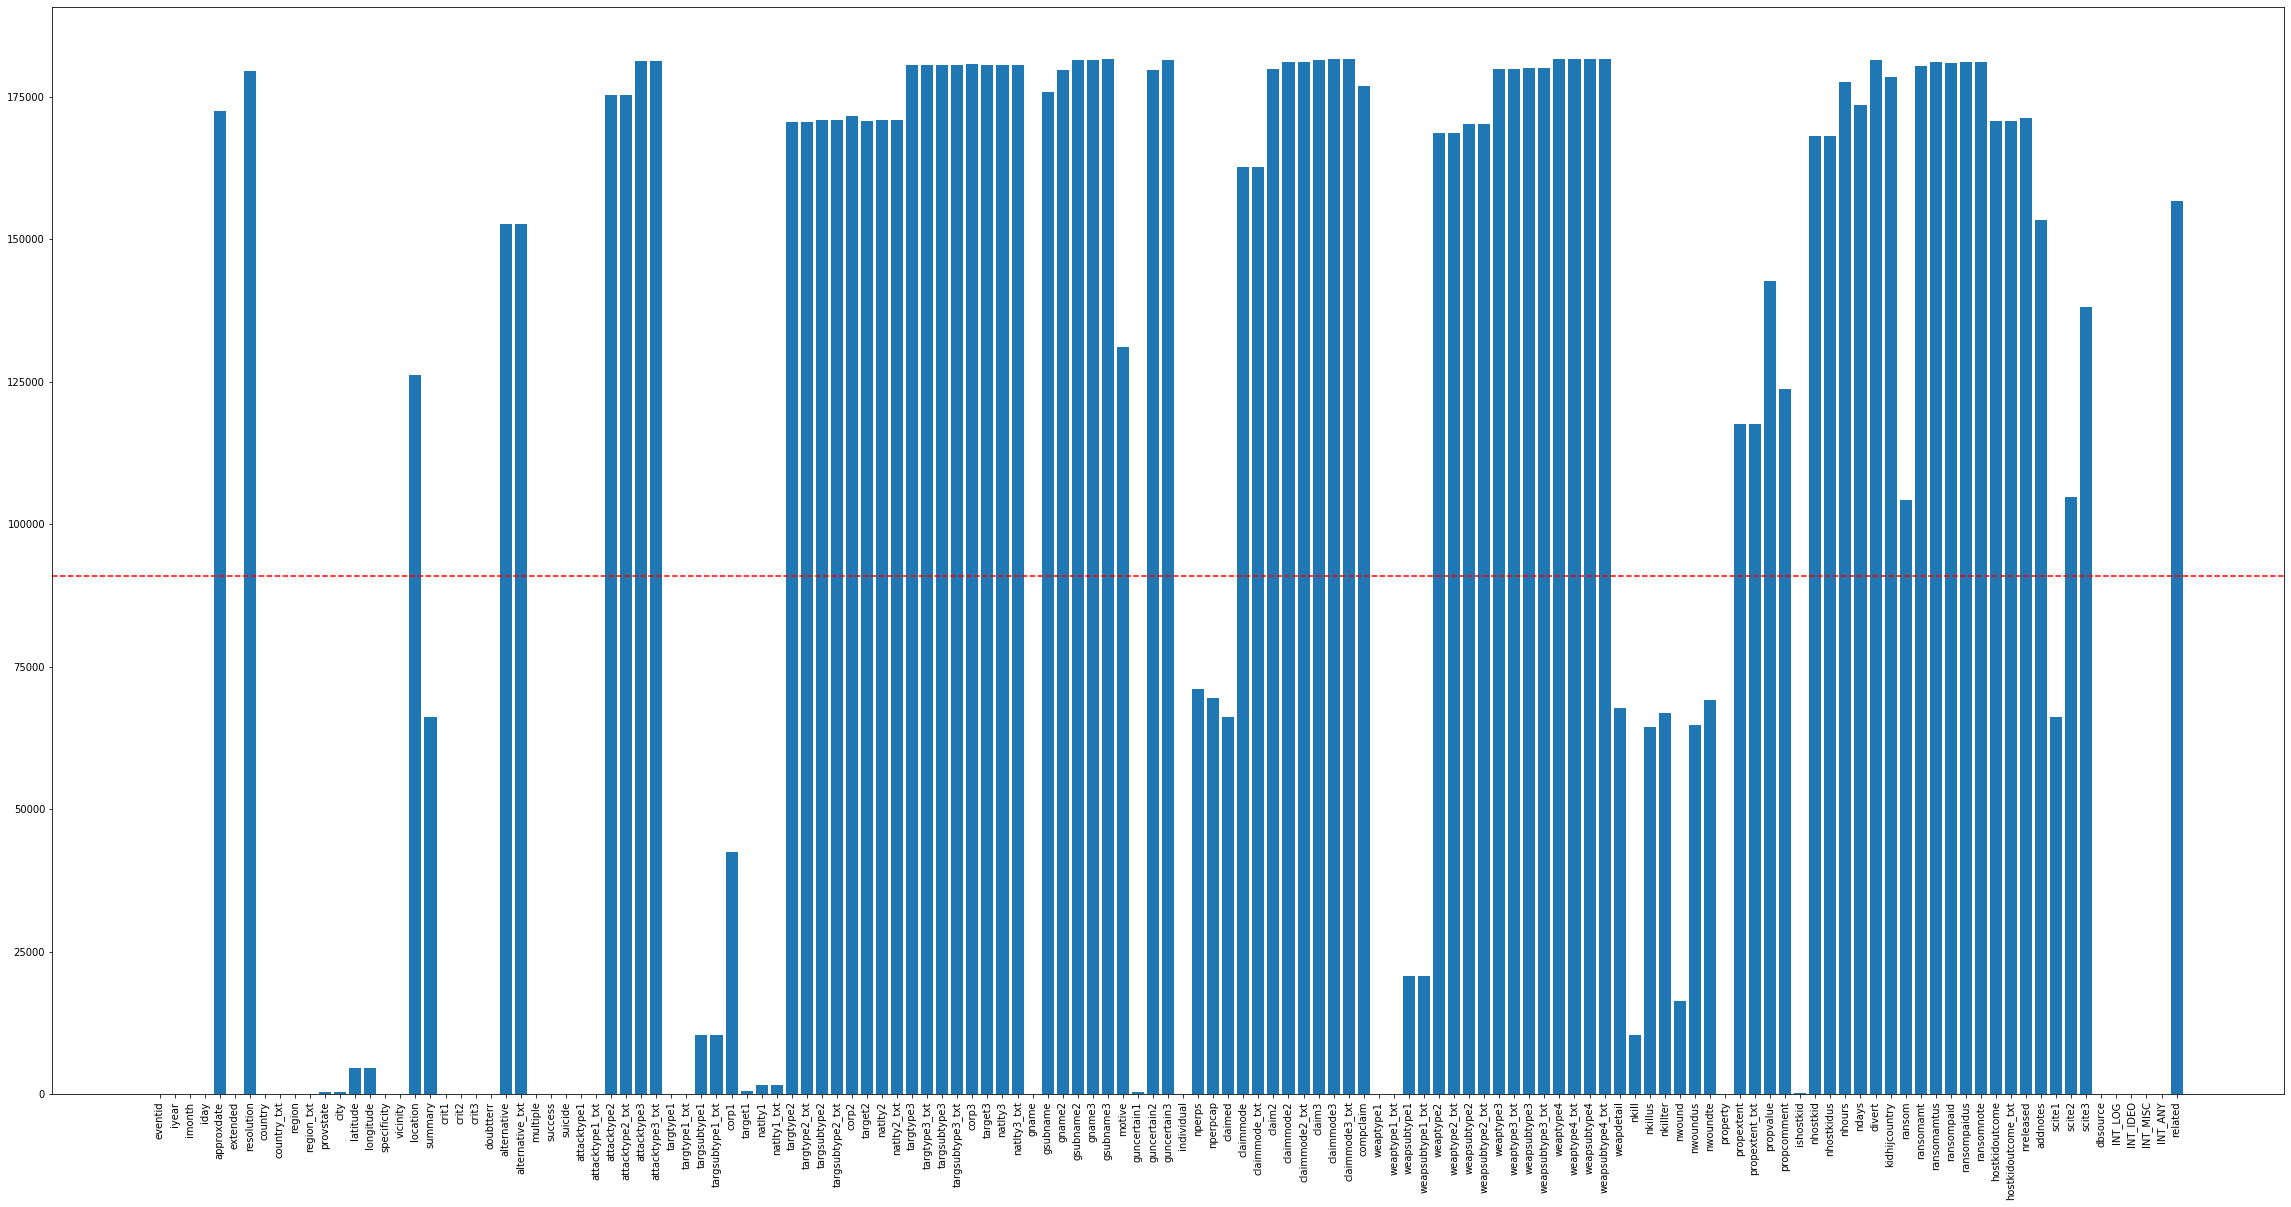

In [5]:
plt.figure(figsize=(40,20))
plt.bar(df.columns,df.iloc[:,:].isna().sum().values)
plt.xticks(Rotation = 90)
plt.axhline(y=90850, color='r', linestyle='--')
plt.show()

In [6]:
df1=df

## Data Cleaning



1-Drop columns with null values(drop columns that have null values more than 50% of total number of samples)

In [7]:
for col in df.columns:
    if df1[col].isna().sum()>90845:
        df1=df1.drop(labels=col, axis=1)

In [8]:
df1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [9]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [10]:
df1.drop(labels=['eventid','country','region','attacktype1','targtype1',
                 'targsubtype1','natlty1','weapsubtype1','weaptype1'], axis=1,inplace=True)

In [11]:
df1.shape

(181691, 49)

2-split features into an array of numeric ones and another array of categeorial ones

In [12]:
df_numerical_features = df1.select_dtypes(include='number')
df_categorical_features = df1.select_dtypes(include='object')

In [13]:
df_numerical_features.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [14]:
df_categorical_features.columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'dbsource'],
      dtype='object')

In [15]:
value_count = []
for i in df_numerical_features.columns:
    x = df_numerical_features[i].nunique()
    value_count.append(x)
    
total_unique=pd.DataFrame(value_count, index = df_numerical_features.columns, columns = ["Total Unique Values"])

In [16]:
total_unique[total_unique['Total Unique Values']>10]

,Total Unique Values
iyear,47
imonth,13
iday,32
latitude,48322
longitude,48039
nperps,113
nperpcap,50
nkill,205
nkillus,31
nkillter,96


In [17]:
categ_col=total_unique[total_unique['Total Unique Values']<10].index

In [18]:
for cat in categ_col:
    df_categorical_features[cat]=df_numerical_features[cat]

C:\Users\Esraa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_numerical_features.drop(labels=categ_col, axis=1,inplace=True)

C:\Users\Esraa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df_categorical_features.columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'dbsource', 'extended', 'specificity',
       'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'guncertain1', 'individual', 'claimed',
       'property', 'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [21]:
df_numerical_features.columns

Index(['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nperps',
       'nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte'],
      dtype='object')

In [22]:
df_numerical_features.shape

(181691, 13)

In [23]:
df_categorical_features.shape

(181691, 36)

In [24]:
df1[df_numerical_features.columns]

,iyear,imonth,iday,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,1970,7,2,18.456792,-69.951164,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
1,1970,0,0,19.371887,-99.086624,7.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,1970,1,0,15.478598,120.599741,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
3,1970,1,0,37.997490,23.762728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,33.580412,130.396361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,2.359673,45.385034,-99.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
181687,2017,12,31,35.407278,35.942679,-99.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0
181688,2017,12,31,6.900742,124.437908,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181689,2017,12,31,24.798346,93.940430,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df1[df_categorical_features.columns[10:]]

,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,scite1,dbsource,extended,specificity,vicinity,...,suicide,guncertain1,individual,claimed,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,Dominican Republic,MANO-D,Unknown,NaN,NaN,NaN,PGIS,0,1.0,0,...,0,0.0,0,NaN,0,0.0,0,0,0,0
1,Belgium,23rd of September Communist League,Unknown,NaN,NaN,NaN,PGIS,0,1.0,0,...,0,0.0,0,NaN,0,1.0,0,1,1,1
2,United States,Unknown,Unknown,NaN,NaN,NaN,PGIS,0,4.0,0,...,0,0.0,0,NaN,0,0.0,-9,-9,1,1
3,United States,Unknown,Explosives,Unknown Explosive Type,Explosive,NaN,PGIS,0,1.0,0,...,0,0.0,0,NaN,1,0.0,-9,-9,1,1
4,United States,Unknown,Incendiary,NaN,Incendiary,NaN,PGIS,0,1.0,0,...,0,0.0,0,NaN,1,0.0,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,Somalia,Al-Shabaab,Firearms,Unknown Gun Type,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,2.0,0,...,0,0.0,0,1.0,-9,0.0,0,0,0,0
181687,Russia,Muslim extremists,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,0,1.0,1,...,0,0.0,0,0.0,1,0.0,-9,-9,1,1
181688,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,Arson/Fire,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,2.0,0,...,0,0.0,0,0.0,1,0.0,0,0,0,0
181689,India,Unknown,Explosives,Grenade,A thrown grenade was used in the attack.,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,0,1.0,0,...,0,0.0,0,0.0,-9,0.0,-9,-9,0,-9


In [26]:
df1[df1.duplicated(keep=False)]

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
67,1970,2,16,0,United States,North America,California,Berkeley,37.874043,-122.280022,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,0,-9
68,1970,2,16,0,United States,North America,California,Berkeley,37.874043,-122.280022,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,0,-9
87,1970,2,23,0,United States,North America,Nebraska,South Sioux City,42.470310,-96.413949,...,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
88,1970,2,23,0,United States,North America,Nebraska,South Sioux City,42.470310,-96.413949,...,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
89,1970,2,23,0,United States,North America,Nebraska,South Sioux City,42.470310,-96.413949,...,0.0,0.0,0,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181431,2017,12,20,0,Philippines,Southeast Asia,Maguindanao,Tamontaka,7.172751,124.229664,...,0.0,0.0,1,0.0,"""Army troopers kill 11 IS gunmen in North Cota...",START Primary Collection,0,0,0,0
181631,2017,12,30,0,Kenya,Sub-Saharan Africa,Garissa,Ijara,-1.595245,40.514259,...,0.0,0.0,1,0.0,"""'Shabaab' burn Ijara Police Station,"" Daily N...",START Primary Collection,1,1,0,1
181633,2017,12,29,0,Israel,Middle East & North Africa,Southern,Unknown,31.506981,34.718904,...,0.0,0.0,0,0.0,"""IDF Retaliates Against Hamas in Gaza, Warns ...",START Primary Collection,-9,-9,1,1
181634,2017,12,29,0,Israel,Middle East & North Africa,Southern,Unknown,31.506981,34.718904,...,0.0,0.0,0,0.0,"""IDF Retaliates Against Hamas in Gaza, Warns ...",START Primary Collection,-9,-9,1,1


3-drop duplicated rows

In [27]:
df1.drop_duplicates(inplace=True)

In [28]:
df1.duplicated(keep=False).sum()

0

4-check outliers

In [29]:
df1[df_numerical_features.columns].describe()

,iyear,imonth,iday,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,172580.000000,172580.000000,172580.000000,168565.000000,1.685640e+05,108201.000000,109911.000000,163117.000000,114737.000000,112393.000000,157273.000000,114480.000000,110244.000000
mean,2003.033631,6.470072,15.519834,23.768771,-4.818857e+02,-67.877339,-1.517810,2.503970,0.046986,0.515228,3.312749,0.039736,0.108623
std,13.195408,3.391650,8.814473,18.313834,2.099201e+05,137.099411,12.840332,11.812284,5.743614,4.240130,36.852401,3.090610,1.503297
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.840929,7.244026e+00,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.528200,4.349141e+01,-99.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.674256,6.894839e+01,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,25000.000000,406.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000


In [30]:
df_test=df1

In [31]:
#replace encoded values with nulls
df_test[['nperps','nperpcap']]=df_test[['nperps','nperpcap']].replace([-99,-9],np.nan,regex = True)

In [32]:
df_test[df_numerical_features.columns].describe()

,iyear,imonth,iday,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,172580.000000,172580.000000,172580.000000,168565.000000,1.685640e+05,28094.000000,108081.000000,163117.000000,114737.000000,112393.000000,157273.000000,114480.000000,110244.000000
mean,2003.033631,6.470072,15.519834,23.768771,-4.818857e+02,20.859151,0.129403,2.503970,0.046986,0.515228,3.312749,0.039736,0.108623
std,13.195408,3.391650,8.814473,18.313834,2.099201e+05,248.509533,2.098080,11.812284,5.743614,4.240130,36.852401,3.090610,1.503297
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.840929,7.244026e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.528200,4.349141e+01,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.674256,6.894839e+01,6.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,25000.000000,406.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000


In [33]:
#replace null values with zeros
df[['nkill','nkillus','nkillter']] = df[['nkill','nkillus','nkillter']].replace(np.nan, 0)

In [34]:
df[['nkill','nkillus','nkillter']].isnull().sum()

nkill       0
nkillus     0
nkillter    0
dtype: int64

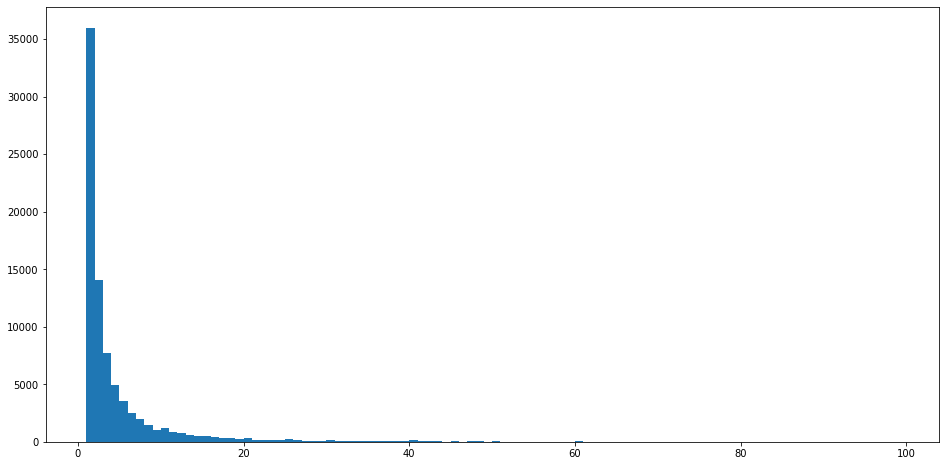

In [35]:
plt.figure(figsize=(16,8))
plt.hist(df_test['nkill'],range=(0,100),bins=range(1,100,1));
plt.xticks();

In [36]:
df[df['region_txt']=='South Asia']['nkill'].max()

518.0

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

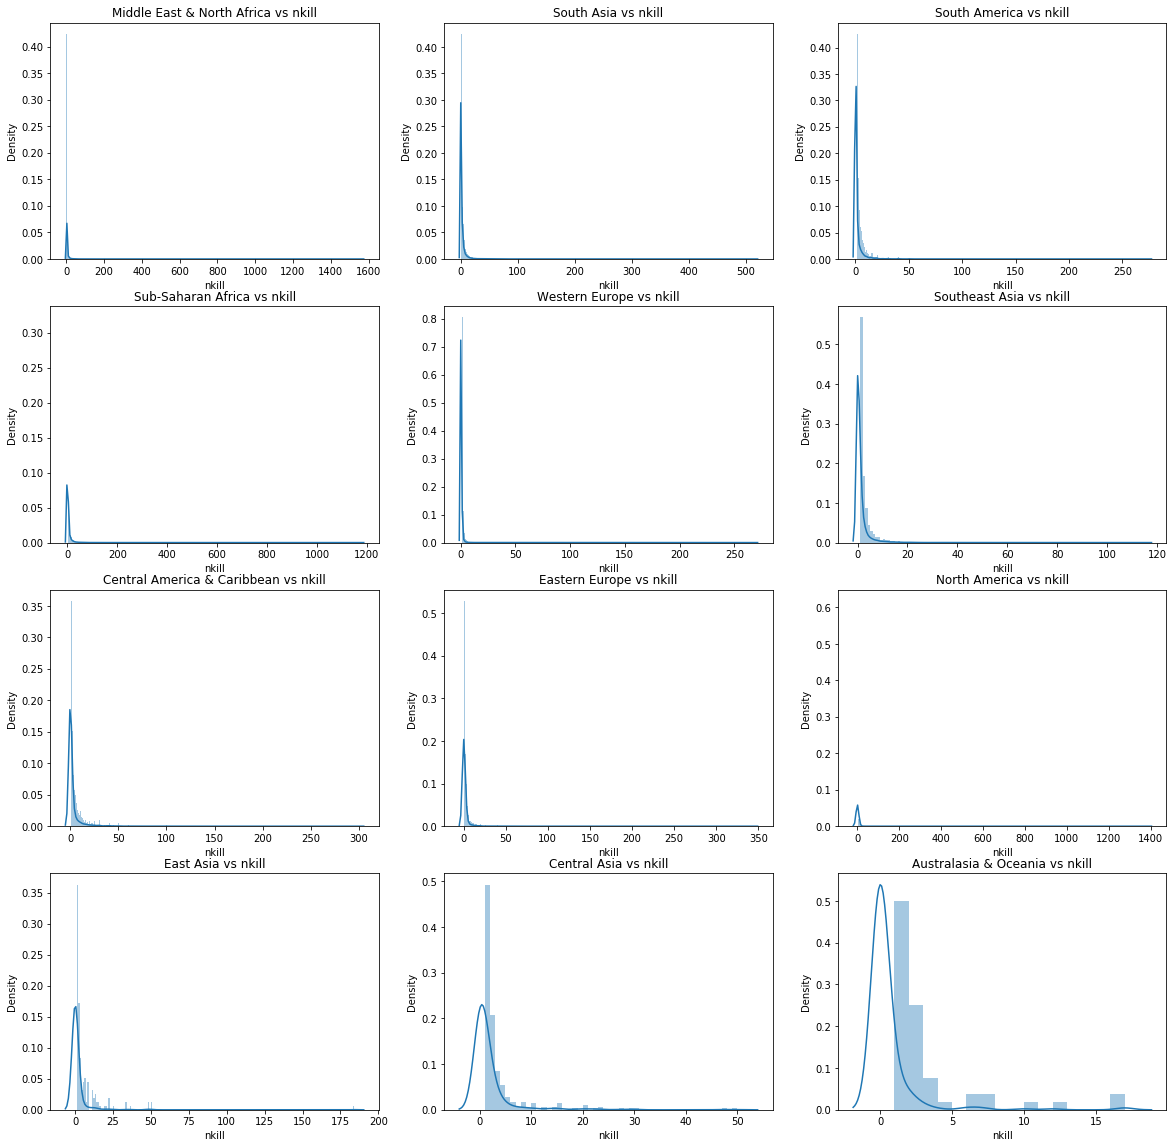

In [37]:
plt.figure(figsize=(20,20))
i=1
for reg in df['region_txt'].value_counts().keys():
    ax=plt.subplot(4,3,i)
    Min=int(df[df['region_txt']==reg]['nkill'].min())
    Max=int(df[df['region_txt']==reg]['nkill'].max())
    sb.distplot(df[df['region_txt']==reg]['nkill'],bins=range(Min+1,Max+1,1))
    plt.title(reg+' vs nkill')
    i=i+1
plt.show()

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


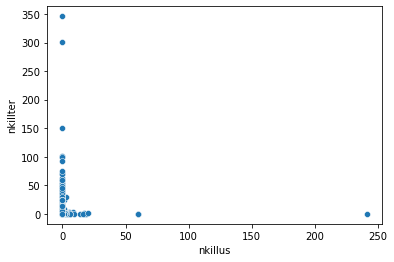

In [38]:
sb.scatterplot(df[df['region_txt']=='Middle East & North Africa']['nkillus'],df[df['region_txt']=='Middle East & North Africa']['nkillter'])

No correlation was found between these 2 variables

In [39]:
df_test[['nperps','nperpcap']].isna().sum()

nperps      144486
nperpcap     64499
dtype: int64

In [40]:
cols=["iyear","imonth","iday"]
df_test['date'] = df_test[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [41]:
df_test.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,...,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,NaN,0,0.0,NaN,PGIS,0,0,0,0,1970-7-2
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,NaN,0,1.0,NaN,PGIS,0,1,1,1,1970-0-0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,NaN,0,0.0,NaN,PGIS,-9,-9,1,1,1970-1-0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,NaN,1,0.0,NaN,PGIS,-9,-9,1,1,1970-1-0
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,NaN,1,0.0,NaN,PGIS,-9,-9,1,1,1970-1-0


# Data Analysis

## Univariant analysis

In [42]:
df_test['iyear'].nunique()

47

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


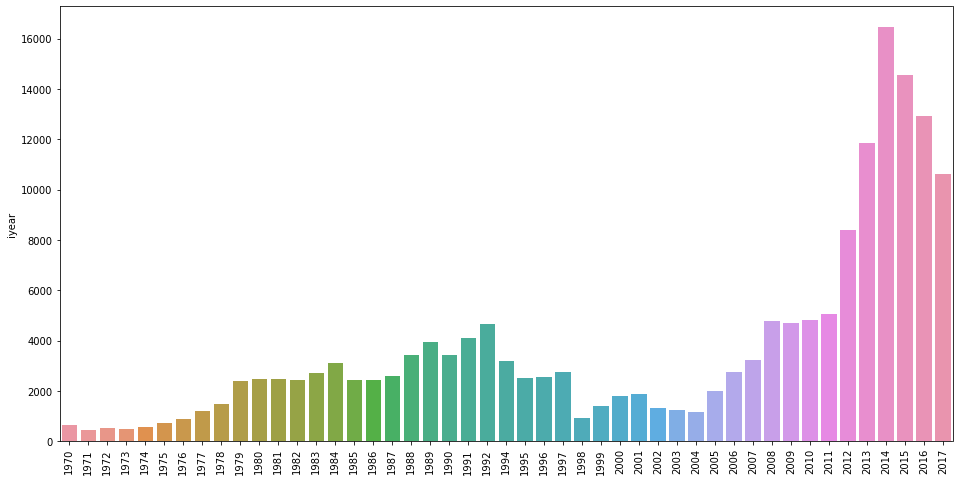

In [43]:
plt.figure(figsize=(16,8))
ax=sb.barplot(df_test['iyear'].value_counts().index , df_test['iyear'].value_counts());
ax.set_xticklabels(ax.get_xticklabels() ,Rotation = 90);

In [44]:
df_test['gname'].nunique()

3537

In [45]:
df_test['gname'].value_counts()[10:30]

Kurdistan Workers' Party (PKK)                    2234
Basque Fatherland and Freedom (ETA)               1915
Communist Party of India - Maoist (CPI-Maoist)    1854
Maoists                                           1609
Liberation Tigers of Tamil Eelam (LTTE)           1575
National Liberation Army of Colombia (ELN)        1408
Tehrik-i-Taliban Pakistan (TTP)                   1344
Palestinians                                      1120
Houthi extremists (Ansar Allah)                   1047
Al-Qaida in the Arabian Peninsula (AQAP)          1009
Nicaraguan Democratic Force (FDN)                  867
Sikh Extremists                                    669
Manuel Rodriguez Patriotic Front (FPMR)            655
Al-Qaida in Iraq                                   620
Muslim extremists                                  616
African National Congress (South Africa)           595
Donetsk People's Republic                          571
Abu Sayyaf Group (ASG)                             525
M-19 (Move

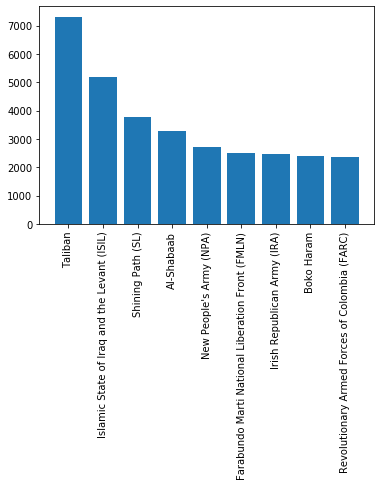

In [46]:
plt.bar(df_test['gname'].value_counts()[1:10].index,df_test['gname'].value_counts()[1:10]);
plt.xticks(Rotation = 90);

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


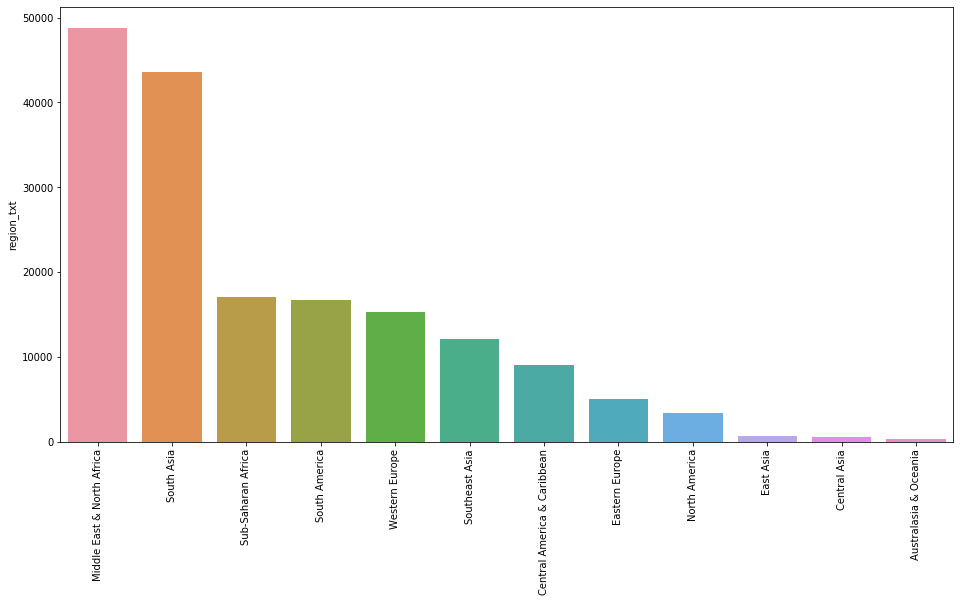

In [47]:
plt.figure(figsize=(16,8))
ax=sb.barplot(df_test['region_txt'].value_counts().index , df_test['region_txt'].value_counts());
ax.set_xticklabels(ax.get_xticklabels() ,Rotation = 90);

## What are the countries that suffer from large numbers of attacks ?

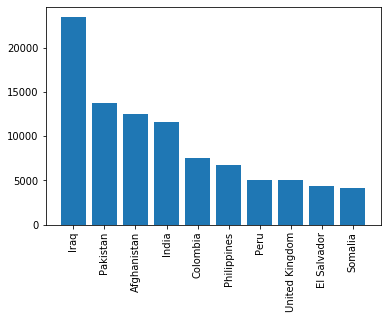

In [48]:
plt.bar(df1['country_txt'].value_counts()[:10].keys(),df1['country_txt'].value_counts()[:10])
plt.xticks(Rotation = 90)
plt.show()

## Bi-variant Analysis

## In these countries what are the types of attacks they are exposed to ?

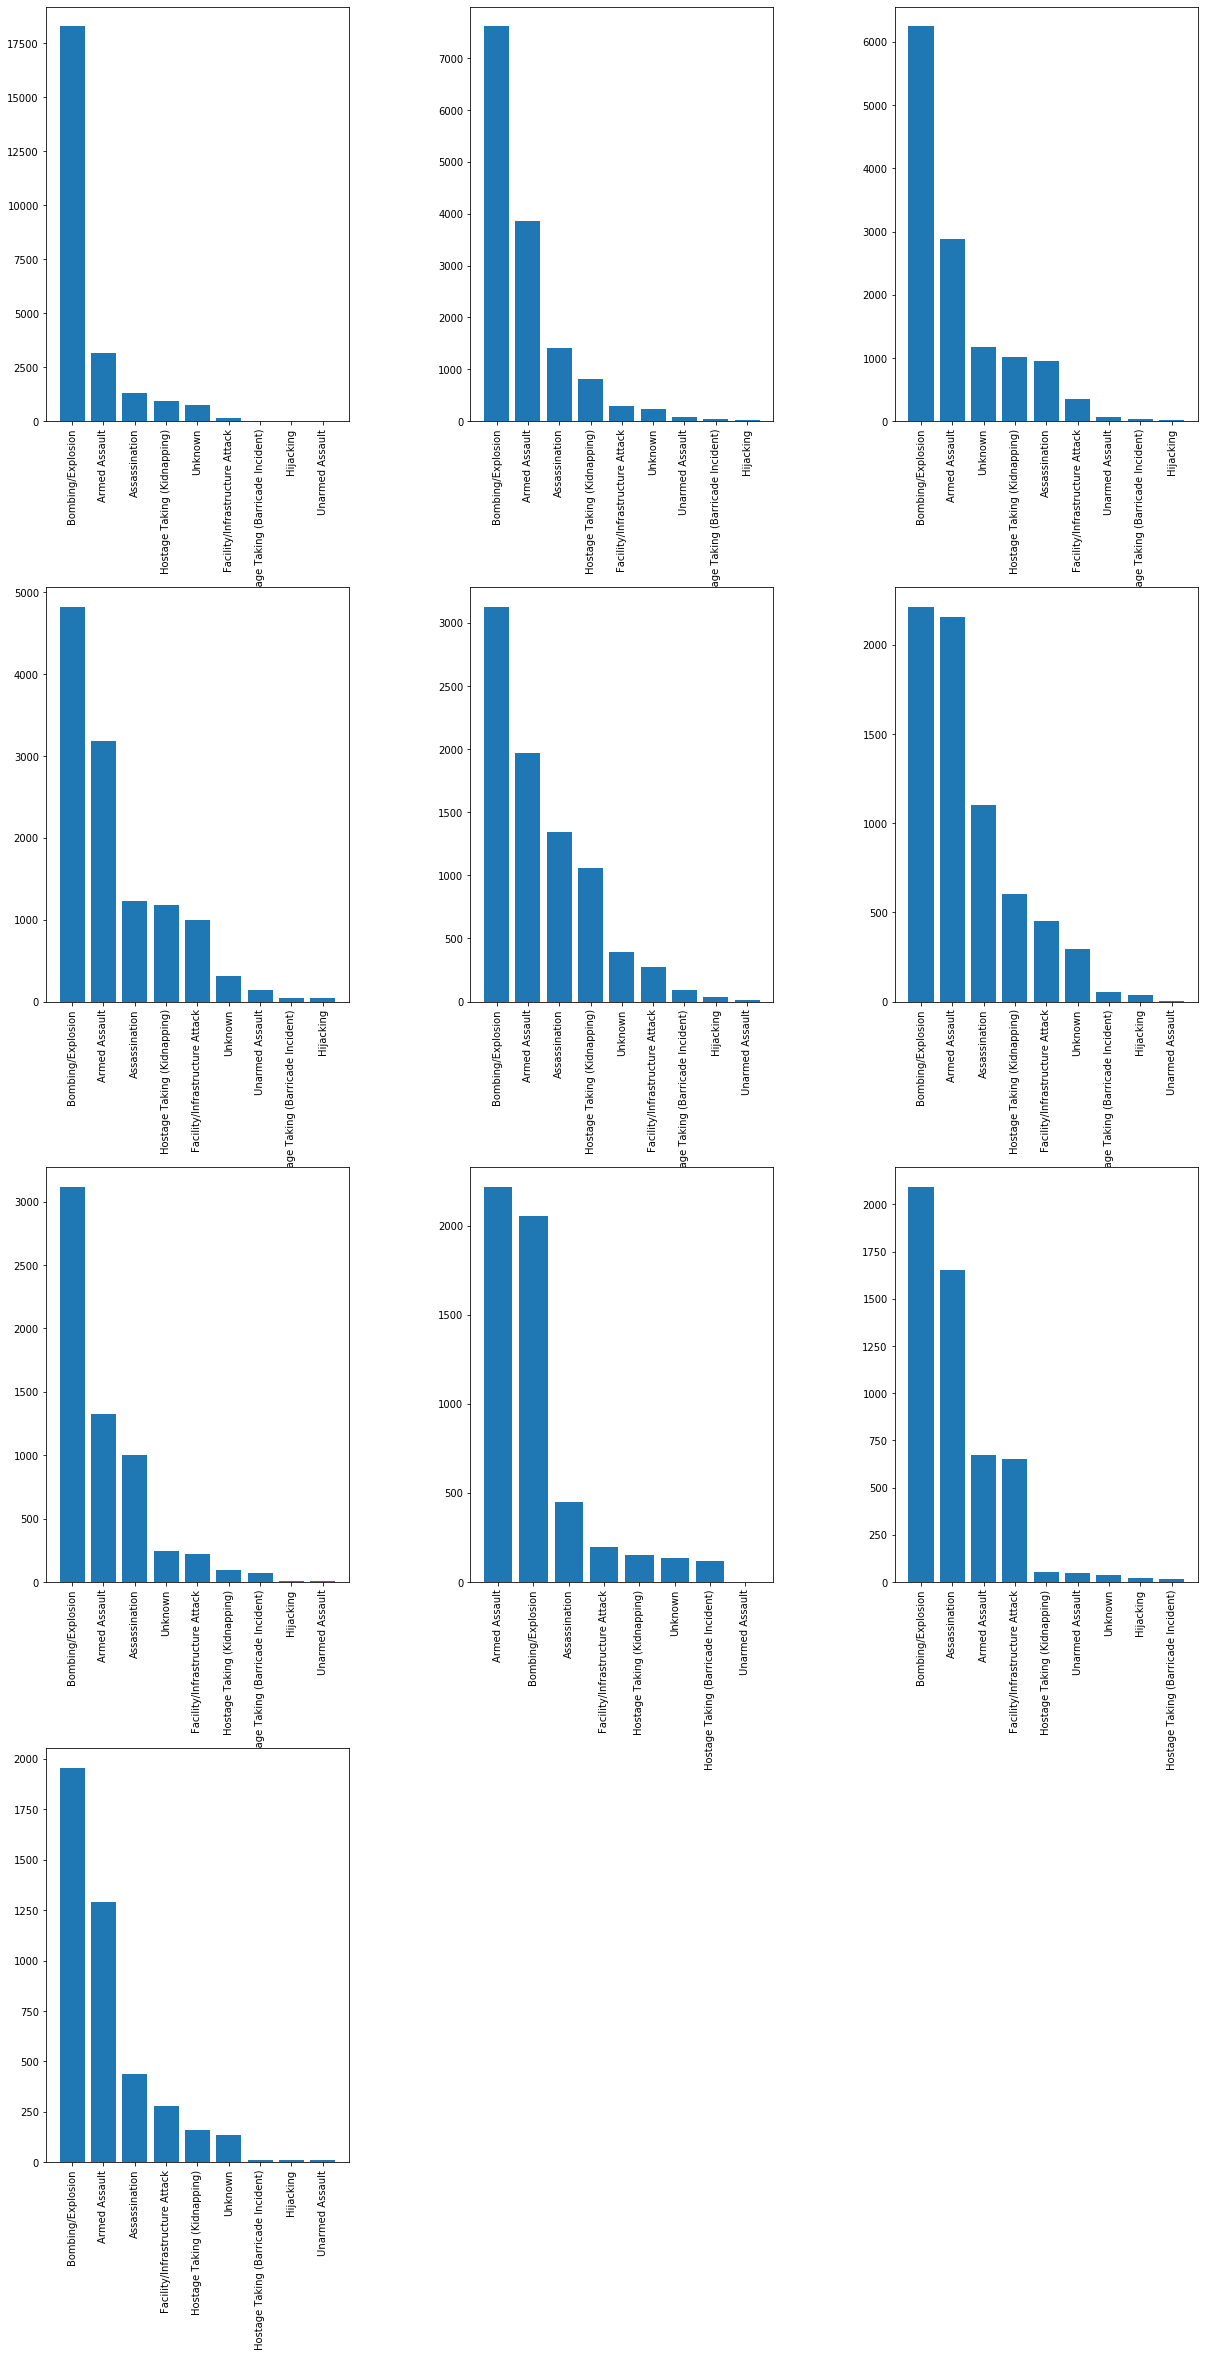

In [49]:
plt.figure(figsize=(20,20))
i=1
for country in df['country_txt'].value_counts()[:10].keys():
    ax=plt.subplot(4,3,i)
    df[df['country_txt']==country]['attacktype1_txt'].value_counts()
    plt.bar(df[df['country_txt']==country]['attacktype1_txt'].value_counts().keys(),df[df['country_txt']==country]['attacktype1_txt'].value_counts())
    plt.xticks(Rotation = 90)
    i=i+1
plt.subplots_adjust(left=0.1,
                    bottom=0.003, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

#### Inspect in each region the gname that are most active

In [50]:
df_test.groupby(['region_txt'])['gname'].value_counts()

region_txt             gname                                    
Australasia & Oceania  Unknown                                      176
                       Bougainville Revolutionary Army (BRA)         26
                       Jihadi-inspired extremists                     6
                       Kanak Socialist National Liberation Front      5
                       Anti-Nuclear extremists                        4
                                                                   ... 
Western Europe         Worker's Brigade                               1
                       Workers Power                                  1
                       World Punishment Organization                  1
                       Yazidi extremists                              1
                       Young Brigade of Navarro                       1
Name: gname, Length: 4116, dtype: int64

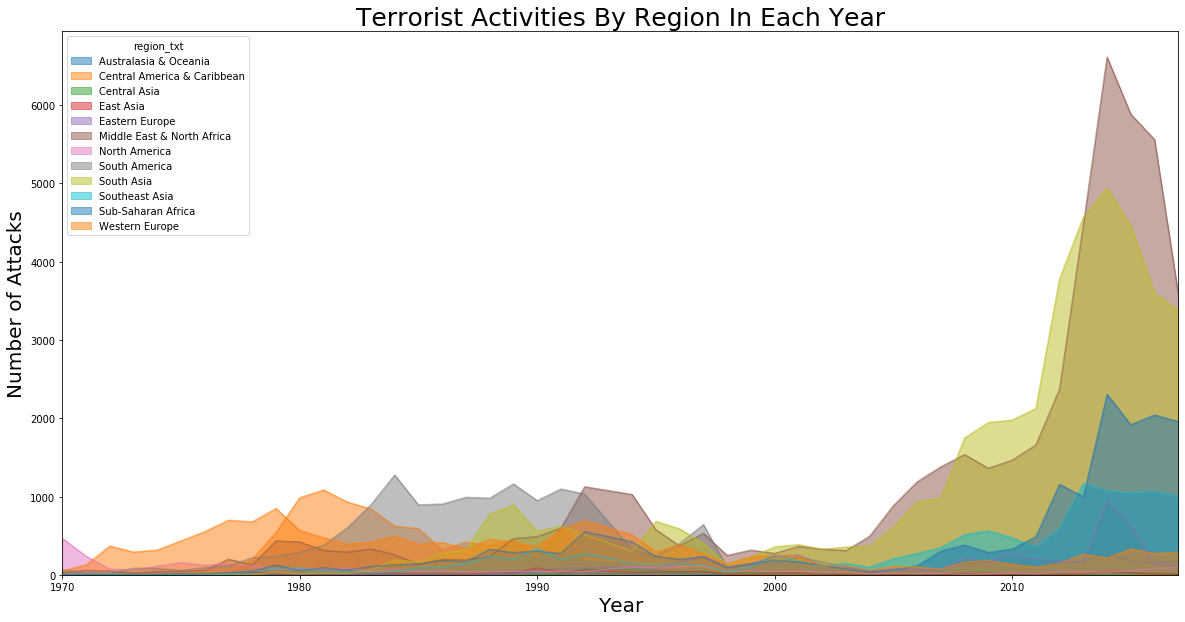

In [51]:
pd.crosstab(df_test['iyear'], df_test['region_txt']).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()